In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Load the dataset

data = pd.read_csv('revenue_prediction.csv')

In [3]:
data.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [5]:
data.describe()

,Id,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,100.000000,1.000000e+02
mean,150.500000,49.080000,4.086000,4.395161e+06
std,29.011492,22.370923,2.055101,2.659932e+06
min,101.000000,18.000000,1.000000,8.498700e+05
25%,125.750000,34.750000,2.750000,2.688328e+06
50%,150.500000,45.000000,3.650000,3.911401e+06
75%,175.250000,57.250000,5.100000,5.330084e+06
max,200.000000,126.000000,13.000000,1.969694e+07


In [6]:
data.tail()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689
99,200,Mimi'sBistro&Bakery,No,BBQ,Mumbai,50,4.4,4567678


In [7]:
data.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

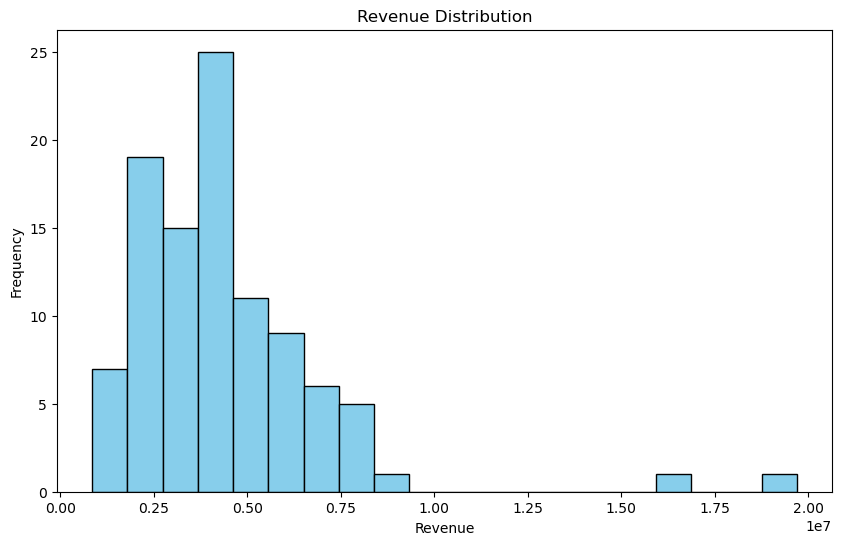

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(data['Revenue'], bins=20, color='skyblue', edgecolor='black')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

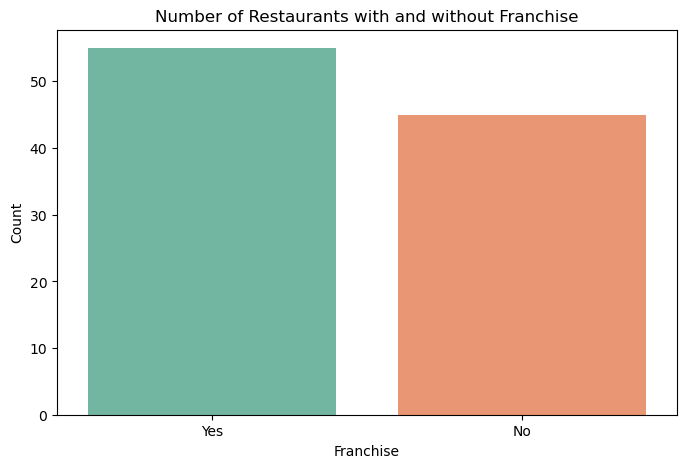

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Franchise', data=data, palette='Set2')
plt.title('Number of Restaurants with and without Franchise')
plt.xlabel('Franchise')
plt.ylabel('Count')
plt.show()


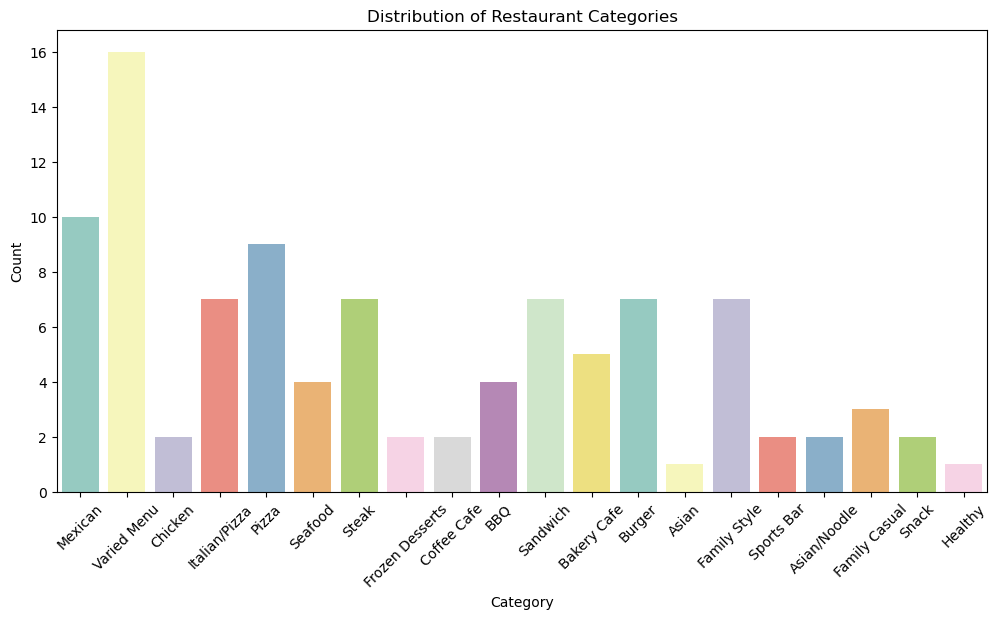

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=data, palette='Set3')
plt.title('Distribution of Restaurant Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

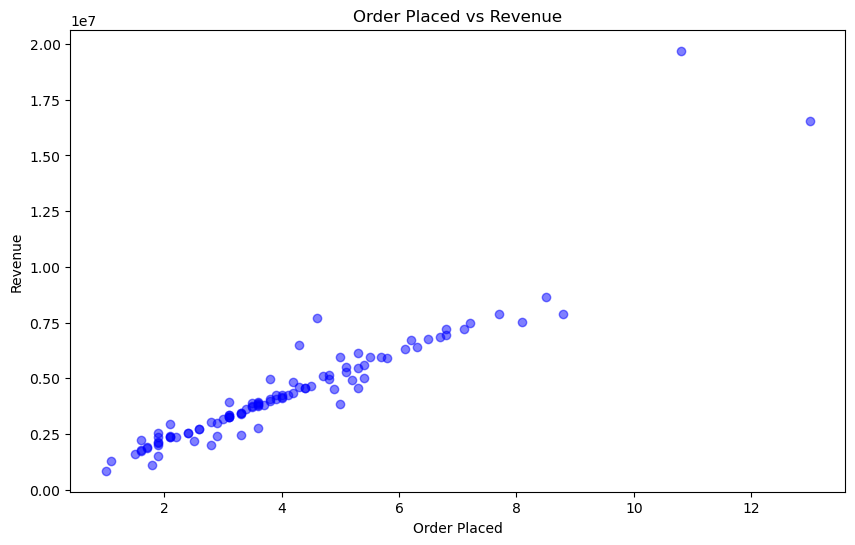

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Order_Placed'], data['Revenue'], alpha=0.5, color='blue')
plt.title('Order Placed vs Revenue')
plt.xlabel('Order Placed')
plt.ylabel('Revenue')
plt.show()

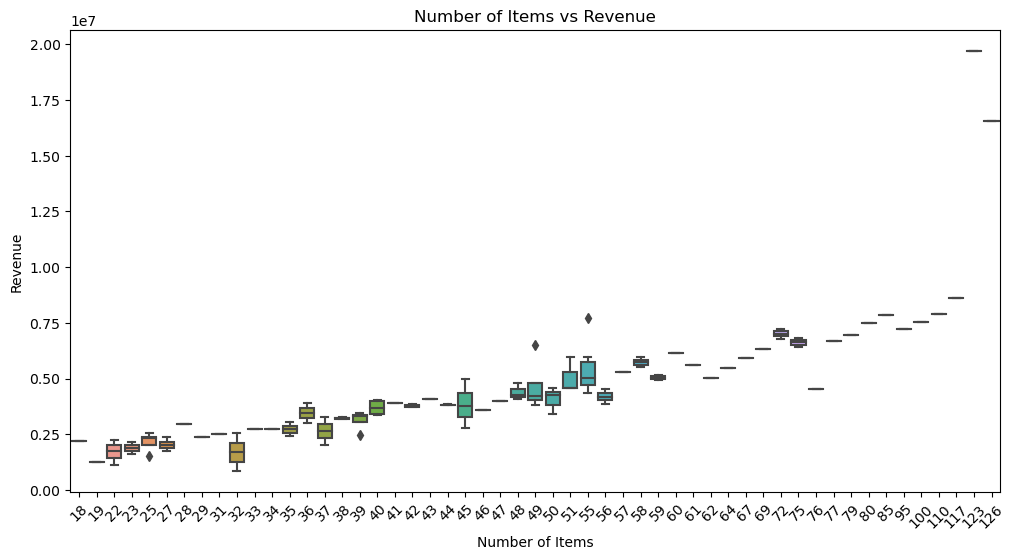

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='No_Of_Item', y='Revenue', data=data)
plt.title('Number of Items vs Revenue')
plt.xlabel('Number of Items')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['NormalizedOrderPlaced'] = scaler.fit_transform(data[['Order_Placed']])

In [20]:
from sklearn.model_selection import train_test_split
features = ['Franchise', 'Category', 'No_Of_Item', 'NormalizedOrderPlaced']
X = pd.get_dummies(data[features], drop_first=True)
y = data['Revenue']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [29]:
dt_predictions=dt_model.predict(X_test)
rf_predictions=rf_model.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
dt_r2 = r2_score(y_test, dt_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

In [31]:
print(f"Decision Tree R^2 Score: {dt_r2}")
print(f"Random Forest R^2 Score: {rf_r2}")
print(f"Decision Tree RMSE: {dt_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")

Decision Tree R^2 Score: 0.5226095120709715
Random Forest R^2 Score: 0.7494471276288739
Decision Tree RMSE: 2021423.4532810908
Random Forest RMSE: 1464435.0422512817


In [33]:
print("\nDecision Tree Performance:")
print(f"R^2 Score: {dt_r2}")
print(f"RMSE: {dt_rmse}")
print(" ")
print("->"*20)
print("\nRandom Forest Performance:")
print(f"R^2 Score: {rf_r2}")
print(f"RMSE: {rf_rmse}")


Decision Tree Performance:
R^2 Score: 0.5226095120709715
RMSE: 2021423.4532810908
 
->->->->->->->->->->->->->->->->->->->->

Random Forest Performance:
R^2 Score: 0.7494471276288739
RMSE: 1464435.0422512817


In [37]:
num_bins = 6
bins = np.linspace(min(y_test), max(y_test), num_bins)
y_test_binned = np.digitize(y_test, bins) - 1
dt_predictions_binned = np.digitize(dt_predictions, bins) - 1
rf_predictions_binned = np.digitize(rf_predictions, bins) - 1

<Figure size 1000x800 with 0 Axes>

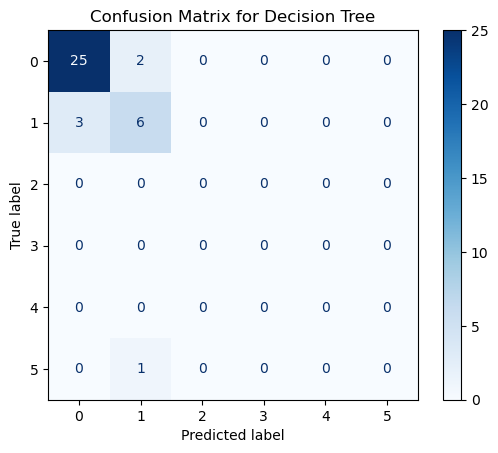

In [44]:
dt_cm = confusion_matrix(y_test_binned, dt_predictions_binned, labels=range(num_bins))
dt_cm_display = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=range(num_bins))
plt.figure(figsize=(10, 8))
dt_cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

<Figure size 1000x800 with 0 Axes>

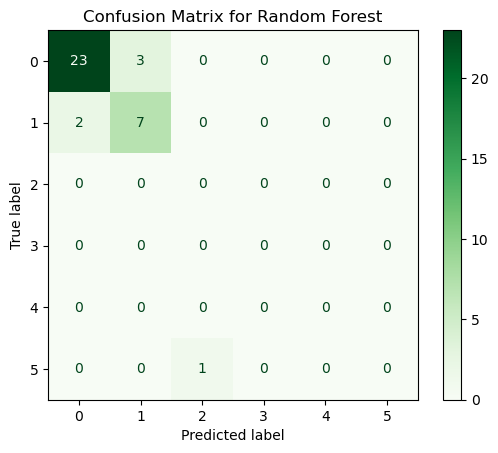

In [40]:
rf_cm = confusion_matrix(y_test_binned, rf_predictions_binned, labels=range(num_bins))
rf_cm_display = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=range(num_bins))
plt.figure(figsize=(10, 8))
rf_cm_display.plot(cmap='Greens')
plt.title('Confusion Matrix for Random Forest')
plt.show()